In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("data_clean_with_dummies.csv")
df = df.set_index('date')
df = df.drop(["time", "Unnamed: 0"], axis = 1)

In [15]:
#Features of our dataset
X = df[df.columns[1:]]

#Features with PCA k=0.999 (PC1 - PC48)
X = df[df.columns[55:103]]

# Output to predict
y = df["pedestrians count"]
type(X)
X.shape

(15358, 48)

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)

In [5]:
from sklearn.preprocessing import StandardScaler

# Scale the inputs to standardize the values
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)


In [6]:
#####################################################################
# compiling the neural network model
model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=X.shape[1]),
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(30, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(25, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-23 11:08:41.988928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-23 11:08:41.989251: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [67]:
# #compiling the neural network model
# model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=X.shape[1]),
#   tf.keras.layers.Dense(250, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(150, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(1)
# ])

In [7]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4900      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 25)                775       
                                                                 
 dense_4 (Dense)             (None, 10)                260       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12,526
Trainable params: 12,526
Non-traina

In [8]:

# # compiling the model
# model.compile(loss=tf.keras.losses.mae,
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['mae'])

# # Training the model
# model.fit(tf.expand_dims(Xtrain, axis=-1), ytrain, epochs=50, validation_split=0.2)

# compiling the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mae'])

# Training the model
model.fit(tf.expand_dims(Xtrain, axis=-1), ytrain, epochs=150, validation_split=0.2)

Epoch 1/150


2022-11-23 11:08:52.649183: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-23 11:08:52.925650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 1914.5648 - mae: 1914.5648

2022-11-23 11:08:55.404839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 3s 10ms/step - loss: 1914.5648 - mae: 1914.5648 - val_loss: 882.3753 - val_mae: 882.3753
Epoch 2/150
269/269 [==============================] - 3s 9ms/step - loss: 789.4658 - mae: 789.4658 - val_loss: 653.6317 - val_mae: 653.6317
Epoch 3/150
269/269 [==============================] - 3s 10ms/step - loss: 628.6536 - mae: 628.6536 - val_loss: 552.5930 - val_mae: 552.5930
Epoch 4/150
269/269 [==============================] - 2s 9ms/step - loss: 540.8398 - mae: 540.8398 - val_loss: 485.0168 - val_mae: 485.0168
Epoch 5/150
269/269 [==============================] - 2s 9ms/step - loss: 480.1524 - mae: 480.1524 - val_loss: 443.5059 - val_mae: 443.5059
Epoch 6/150
269/269 [==============================] - 2s 8ms/step - loss: 436.2185 - mae: 436.2185 - val_loss: 428.5245 - val_mae: 428.5245
Epoch 7/150
269/269 [==============================] - 2s 9ms/step - loss: 407.4127 - mae: 407.4127 - val_loss: 401.5347 - val_mae: 401.5347
Epoch 8/150
269/269 [

In [9]:

ypred = model.predict(Xtest)

 63/144 [============>.................] - ETA: 0s

2022-11-23 11:15:24.179495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 0s 2ms/step


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
#print('R score is :', r2_score(ytest, ypred))

#Old Evaluation
pred_train = model.predict(Xtrain)
print(np.sqrt(mean_squared_error(ytrain,pred_train)))

ypred = model.predict(Xtest)
print(f"MSE: {np.sqrt(mean_squared_error(ytest,ypred))}")
print('R score is :', r2_score(ytest, ypred))
#print(f"MAE (mean??): {np.mean(tf.keras.metrics.mean_absolute_error(ytest, ypred))}")
# print(f"MAE (mean??): {np.mean(np.abs(ypred - ytest))}")
print(f"MAE: {np.sqrt(mean_absolute_error(ytest,ypred))}")
print(f"Overview: {ytest.describe()}")

336/336 [==============================] - 1s 3ms/step
673.8118029008618
144/144 [==============================] - 0s 3ms/step
MSE: 701.6440492517816
R score is : 0.9537113695827845
MAE: 18.043519930443054
Overview: count     4608.000000
mean      2591.601780
std       3261.570796
min          0.000000
25%        138.000000
50%        943.500000
75%       4776.000000
max      18153.000000
Name: pedestrians count, dtype: float64


In [14]:
m = tf.keras.metrics.MeanAbsoluteError()
update_state(
    ytest, ypred, sample_weight=None
)
m.ypred().numpy()

NameError: name 'update_state' is not defined

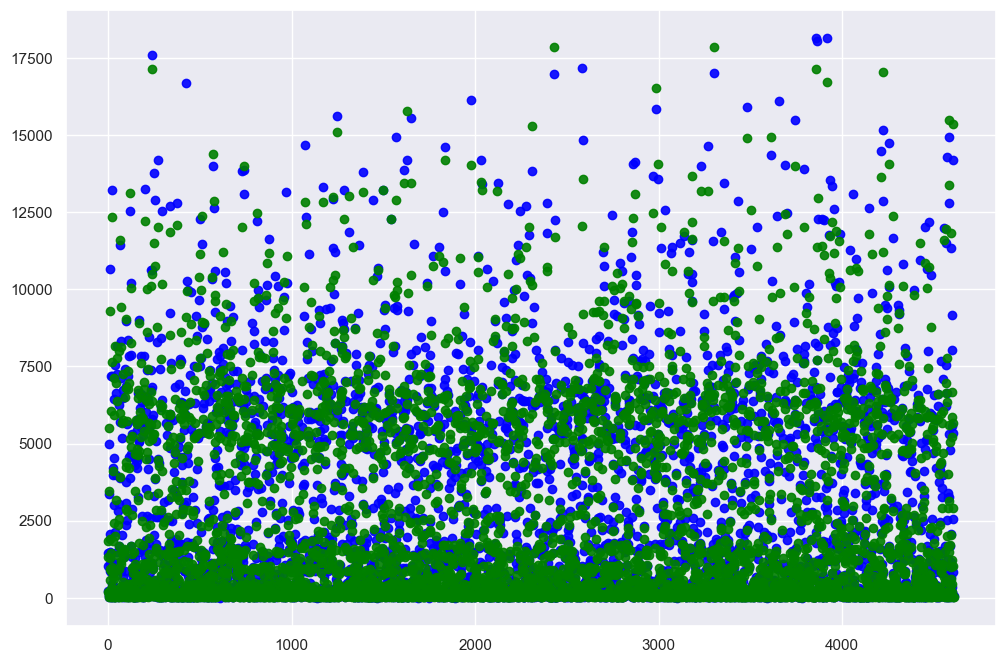

In [11]:
#Visualize the results predictions vs actual values
#Create a sequenze from 0 to the row lenght of the test data in order to plot
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

fig, ax = plt.subplots(figsize=(12, 8))

# ypred = pd.Series(ypred) 

plt.scatter(xs, ytest, color ='blue', alpha=0.9)

plt.scatter(xs, ypred, color ='green', alpha=0.9)

plt.show()